In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from snAPI.Main import *
import pandas as pd
sys.path.append("../")
from HH import HH_T3
from Functions import *
import time

In [19]:
def GetPos(filename):
    parts=filename[:-4].split('_')
    x=float(parts[1])
    y=float(parts[2])
    return x,y
def GetGatedCounts(filename,T):
    sn.getDevice()
    sn.getFileDevice(filename)
    sn.initDevice(MeasMode.T3)
    t_resol=sn.deviceConfig['Resolution']/1000 #in ns
    sn.raw.measure()
    data = sn.raw.getData()
    channels=sn.raw.channel(data)
    dTimes=sn.raw.dTime_T3(data)[np.where(channels==3)]*t_resol
    sn.closeDevice()
    return np.size(dTimes)

In [4]:
def ImageData(pathtoPTUs,gate):
    arr=np.array([0,0,0])
    for file in os.listdir(pathtoPTUs):
        if file[0:3]=='PTU':
            t0=time.time()
            x,y=GetPos(file)
            c=GetGatedCounts(pathtoPTUs+file,gate)
            arr=np.vstack((arr,[x,y,c]))
            t1=time.time()
            print(t1-t0)
    arr=np.delete(arr,0,0)
    return arr

In [5]:
filename='../../../Acquisition2/Data/QD1e-4_large/PTU_-0.51_-0.51.ptu'
os.listdir(filename)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../../../Acquisition2/Data/QD1e-4_large/PTU_-0.51_-0.51.ptu'

In [6]:
sn=snAPI()

In [7]:
sn.getFileDevice(filename)
sn.initDevice(MeasMode.T3)
t_resol=sn.deviceConfig['Resolution']/1000 #in ns
sn.raw.measure()
data= sn.raw.getData()

sn.closeDevice()

In [8]:
sn.closeDevice()

In [9]:
data

array([], dtype=uint32)

In [10]:
plt.plot(data[3])

IndexError: index 3 is out of bounds for axis 0 with size 0

In [11]:
pathtoPTUs='../../../Acquisition/Acquisition2/Data/QD1e-3/'
os.listdir(pathtoPTUs)

['PTU_-0.26_-0.26.ptu',
 'PTU_-0.26_-0.79.ptu',
 'PTU_-0.26_-1.32.ptu',
 'PTU_-0.26_-1.84.ptu',
 'PTU_-0.26_-2.37.ptu',
 'PTU_-0.26_-2.89.ptu',
 'PTU_-0.26_-3.42.ptu',
 'PTU_-0.26_-3.95.ptu',
 'PTU_-0.26_-4.47.ptu',
 'PTU_-0.26_-5.00.ptu',
 'PTU_-0.26_0.26.ptu',
 'PTU_-0.26_0.79.ptu',
 'PTU_-0.26_1.32.ptu',
 'PTU_-0.26_1.84.ptu',
 'PTU_-0.26_2.37.ptu',
 'PTU_-0.26_2.89.ptu',
 'PTU_-0.26_3.42.ptu',
 'PTU_-0.26_3.95.ptu',
 'PTU_-0.26_4.47.ptu',
 'PTU_-0.26_5.00.ptu',
 'PTU_-0.79_-0.26.ptu',
 'PTU_-0.79_-0.79.ptu',
 'PTU_-0.79_-1.32.ptu',
 'PTU_-0.79_-1.84.ptu',
 'PTU_-0.79_-2.37.ptu',
 'PTU_-0.79_-2.89.ptu',
 'PTU_-0.79_-3.42.ptu',
 'PTU_-0.79_-3.95.ptu',
 'PTU_-0.79_-4.47.ptu',
 'PTU_-0.79_-5.00.ptu',
 'PTU_-0.79_0.26.ptu',
 'PTU_-0.79_0.79.ptu',
 'PTU_-0.79_1.32.ptu',
 'PTU_-0.79_1.84.ptu',
 'PTU_-0.79_2.37.ptu',
 'PTU_-0.79_2.89.ptu',
 'PTU_-0.79_3.42.ptu',
 'PTU_-0.79_3.95.ptu',
 'PTU_-0.79_4.47.ptu',
 'PTU_-0.79_5.00.ptu',
 'PTU_-1.32_-0.26.ptu',
 'PTU_-1.32_-0.79.ptu',
 'PTU_-1.32_

In [12]:
#os.listdir('../../../Acquisition/Acquisition2/Data/Trial/')

In [20]:
d=ImageData(pathtoPTUs,0)

0.46980953216552734
0.4991936683654785
0.503178596496582
0.4557631015777588
0.4948422908782959
0.499006986618042
0.5146908760070801
0.48474621772766113
0.4849367141723633
0.4898519515991211
0.5011892318725586
0.5013704299926758
0.5006659030914307
0.47454833984375
0.5002148151397705
0.4704620838165283
0.4983341693878174
0.4836750030517578
0.47881245613098145
0.4828307628631592
0.49257946014404297
0.46660280227661133
0.5039143562316895
0.4848001003265381
0.539863109588623
0.4952430725097656
0.5230278968811035
0.47546863555908203
0.4840092658996582
0.4713907241821289
0.5134096145629883
0.4777505397796631
0.532170295715332
0.5399494171142578
0.5834195613861084
0.48448681831359863
0.5471429824829102
0.4844491481781006
0.5431158542633057
0.5031464099884033
0.4845864772796631
0.5003392696380615
0.4840691089630127
0.48245811462402344
0.5021228790283203
0.499983549118042
0.4844212532043457
0.5156724452972412
0.5149340629577637
0.5005753040313721
0.5000612735748291
0.4843931198120117
0.519981861

KeyboardInterrupt: 

In [14]:
d.T[2]

NameError: name 'd' is not defined

In [12]:
xs=np.unique(d.T[0])
ys=np.unique(d.T[1])
m=np.zeros((np.size(xs),np.size(ys)))
for point in d:
    ind_x=np.where(xs==point[0])[0][0]
    ind_y=np.where(ys==point[1])[0][0]
    m[ind_x,ind_y]=point[2]   

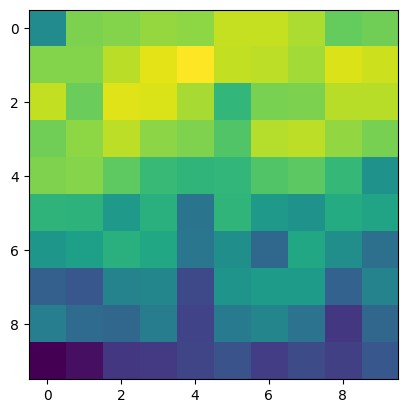

In [13]:
plt.imshow(m)